# Project B


This notebook will an exploratory data analysis of the chosen dataset.

## Packages Needed

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import zipfile

from bokeh.plotting import figure
from bokeh.io import show, output_notebook
from bokeh.models import ColumnDataSource, FactorRange, Legend, HoverTool
from bokeh.palettes import Category20c, Pastel1
from bokeh.layouts import column, row, widgetbox, gridplot

output_notebook()

Loading BokehJS ...

## Load Data Business Dataset + Prep

In [39]:
df = pd.read_csv('yelp_reviews_RV_categories.csv', 
                 usecols=['name','address','city','state','latitude', 'longitude','stars',
                         'attributes','categories','hours','text','date','review_stars','cat_kitchen','cat_type'])
print(df.shape)

(5177322, 15)


In [40]:
df['date'] = pd.to_datetime(df['date'])

In [41]:
df['cat_type'].value_counts()

Nightlife             997131
Bars                  974350
Food                  684773
Breakfast & Brunch    497283
Sandwiches            266517
Burgers               244596
Sushi Bars            216243
Pizza                 203438
Salad                 180963
Wine Bars             151418
Vegetarian            149865
Steakhouses           137014
Coffee & Tea          117560
Diners                106299
Cafes                 105476
Fast Food             100563
Buffets                43833
Name: cat_type, dtype: int64

## Plots for the Overview page

### General plots - Michelle

In [42]:
restaurants = df.drop_duplicates(subset='name')
restaurants.shape

(8688, 15)

In [43]:
group_state_ = restaurants.groupby(['cat_kitchen']).size().reset_index(name='Counts').sort_values(by='Counts',ascending=False)
group_state_['Type'] = group_state_['cat_kitchen'].astype(str)
df_dict_ = group_state_.to_dict('list')

In [44]:
group_state__ = restaurants.groupby(['cat_type']).size().reset_index(name='Counts').sort_values(by='Counts',ascending=False)
group_state__['Type'] = group_state__['cat_type'].astype(str)
df_dict__ = group_state__.to_dict('list')

In [45]:
group_state = restaurants.groupby(['state']).size().reset_index(name='Counts').sort_values(by='Counts',ascending=False)
group_state['state'] = group_state['state'].astype(str)
df_dict = group_state.to_dict('list')

In [46]:
title = 'Restaurants by state'
xlabel = 'State'
range_x = group_state.state.unique().tolist()

plot1 = figure(x_range=FactorRange(factors=range_x), plot_width=600, plot_height=300,
               x_axis_label=xlabel, toolbar_location=None, title=title)
plot1.vbar(x='state', width=0.7, bottom=0,
           top='Counts', source=df_dict)

# hover tool
plot1.add_tools(HoverTool(tooltips=[('Count', "@Counts{1}")]))

# axis ticks
plot1.xaxis.major_tick_line_color = None 
plot1.xaxis.minor_tick_line_color = None 
plot1.yaxis.major_tick_line_color = None  
plot1.yaxis.minor_tick_line_color = None  
plot1.title.text_font_size = '13pt'
plot1.title.align = 'center'

show(plot1)

In [47]:
title = 'Restaurants by kitchen'
range_x = group_state_['cat_kitchen'].unique().tolist()
xlabel = 'Kitchen type'

plot2 = figure(x_range=FactorRange(factors=range_x), plot_width=600, plot_height=500,
               x_axis_label=xlabel, toolbar_location=None, title=title)
plot2.vbar(x='Type', width=0.7, bottom=0,
           top='Counts', source=df_dict_)

# hover tool
plot2.add_tools(HoverTool(tooltips=[('Count', "@Counts")]))

# axis ticks
plot2.xaxis.major_tick_line_color = None 
plot2.xaxis.minor_tick_line_color = None 
plot2.yaxis.major_tick_line_color = None  
plot2.yaxis.minor_tick_line_color = None  
plot2.xaxis.major_label_orientation = "vertical"
plot2.title.text_font_size = '13pt'
plot2.title.align = 'center'

show(plot2)

In [48]:
title = 'Restaurants by Categories'
range_x = group_state__['cat_type'].unique().tolist()
xlabel = 'Categories'

plot3 = figure(x_range=FactorRange(factors=range_x), plot_width=600, plot_height=500,
               x_axis_label=xlabel, toolbar_location=None, title=title)
plot3.vbar(x='Type', width=0.7, bottom=0,
           top='Counts', source=df_dict__)

# hover tool
plot3.add_tools(HoverTool(tooltips=[('Count', "@Counts")]))

# axis ticks
plot3.xaxis.major_tick_line_color = None 
plot3.xaxis.minor_tick_line_color = None 
plot3.yaxis.major_tick_line_color = None  
plot3.yaxis.minor_tick_line_color = None  
plot3.xaxis.major_label_orientation = "vertical"
plot3.title.text_font_size = '13pt'
plot3.title.align = 'center'

show(plot3)

### Score plots - Michelle

### Time plots - Julius

**For hver time, hver dag**

In [49]:
sorter = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday','Sunday']
day_hour = df.groupby([df.date.dt.day_name(), df['date'].dt.hour])['stars'].count().reindex(sorter,level=0)
day_hour.index.names = ["Weekday", "Hour of the day"]
day_hour = day_hour.unstack(0)

fig = px.line(day_hour, x=day_hour.index, y=day_hour.columns, width=1000, height=600)
fig.update_traces(hovertemplate=None)
fig.update_layout(title_text="Total number of reviews during the day", 
                  #xaxis_title="...", 
                  yaxis_title="Number of reviews",
                  hovermode="x unified")
fig.show()

**Hver time, hver category**

In [50]:
cat_hour = df.groupby(['cat_type', df['date'].dt.hour])['stars'].count()
cat_hour.index.names = ["Category", "Hour of the day"]
cat_hour = cat_hour.unstack(0)

fig = px.line(cat_hour, x=cat_hour.index, y=cat_hour.columns, width=1000, height=600)
fig.update_traces(hovertemplate=None)
fig.update_layout(title_text="Review times for each focus category", 
                  yaxis_title="Number of reviews",
                  hovermode="x unified")
fig.show()

**Hvert år - bar**

In [51]:
years = pd.DataFrame(df['date'].dt.year.value_counts()).reset_index()\
        .rename(columns={"index":"Year","date": "Review count"}).sort_index()
fig = px.bar(years, x=years.Year, y=years['Review count'])
fig.update_traces(hovertemplate=None)
fig.update_layout(title_text="Number of reviews each year", 
                  xaxis_title="Year", 
                  yaxis_title="Number of reviews",
                  hovermode="x unified")
fig.show()

**Hver måned, hvert år** se 2020 :o

In [52]:
sorter = ['January', 'February', 'March', 'April', 'May', 'June','July',
          'August','September','October','November','December']

day_hour = df[df.date.dt.year != 2021].groupby([df['date'].dt.year, df.date.dt.month_name()])['stars'].count().reindex(sorter,level=1)
day_hour.index.names = ["Year", "Month"]
day_hour = day_hour.unstack(0)

fig = px.line(day_hour, x=day_hour.index, y=day_hour.columns)
fig.update_traces(hovertemplate=None)
fig.update_layout(title_text="Total number of reviews each month in the different years", 
                  #xaxis_title="...", 
                  yaxis_title="Number of reviews",
                  hovermode="x unified")
fig.show()

# World map with time

<AxesSubplot:>

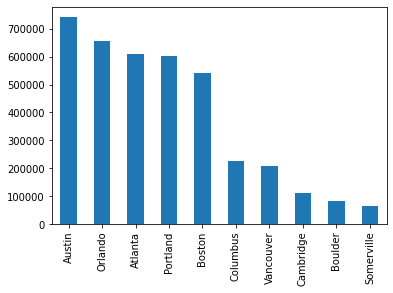

In [53]:
df.city.value_counts()[:10].plot.bar()

In [54]:
austin=df[(df.date > '2020-01-01') & (df.date < '2020-05-01') & (df.city == 'Austin')]
orlando=df[(df.date > '2020-01-01') & (df.date < '2020-05-01') & (df.city == 'Orlando')]
austin['datenotime'] = austin['date'].dt.date.astype(str)
orlando['datenotime'] = orlando['date'].dt.date.astype(str)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [55]:
res_pos_au = austin[['name', 'latitude', 'longitude']].drop_duplicates(['name']).set_index(['name'])
res_pos_or = orlando[['name', 'latitude', 'longitude']].drop_duplicates(['name']).set_index(['name'])

In [56]:
pivot_au = austin.pivot_table(values='review_stars',index=['datenotime','name'],aggfunc=['count',np.mean])
pivot_or =orlando.pivot_table(values='review_stars',index=['datenotime','name'],aggfunc=['count',np.mean])

In [57]:
pivot_au.columns = ['review_count', 'avg_stars']
pivot_or.columns = ['review_count', 'avg_stars']

In [58]:
pivot_au = pivot_au.join(res_pos_au)
pivot_or = pivot_or.join(res_pos_or)

In [59]:
days = pivot_au.index.levels[0].tolist()

## Austin

In [77]:
import configparser
config = configparser.ConfigParser()
config.read('config.ini')
mapbox_token = config['mapbox']['secret_token']

In [88]:
frames = [{   
    'name':'frame_{}'.format(day),
    'data':[{
        'type':'scattermapbox',
        'lat':pivot_au.xs(day)['latitude'],
        'lon':pivot_au.xs(day)['longitude'],
        'marker':go.scattermapbox.Marker(
            size=pivot_au.xs(day)['review_count'],
            color=pivot_au.xs(day)['avg_stars'],
            showscale=True,
            colorscale='RdYlGn',
            colorbar={'title':'Stars', 'titleside':'top', 'thickness':4},#, 'ticksuffix':' %'},
        ),
        'customdata':np.stack((pivot_au.xs(day)['review_count'],  pivot_au.xs(day)['avg_stars'], pd.Series(pivot_au.xs(day).index)), axis=-1),
        'hovertemplate': "<extra></extra><em>%{customdata[2]}  </em><br>Reviews this day: %{customdata[0]}<br>Avg. ⭐ given %{customdata[1]}",
    }],           
} for day in days]
sliders = [{
    'transition':{'duration': 0},
    'x':0.08, 
    'len':0.88,
    'currentvalue':{'font':{'size':15}, 'prefix':'📅 ', 'visible':True, 'xanchor':'center'},  
    'steps':[
        {
            'label':day,
            'method':'animate',
            'args':[
                ['frame_{}'.format(day)],
                {'mode':'immediate', 'frame':{'duration':100, 'redraw': True}, 'transition':{'duration':50}}
              ],
        } for day in days]
}]

play_button = {
    'type':'buttons',
    'showactive':True,
    'x':0.045, 'y':-0.08,
    'buttons':[{ 
        'label':'▶️', # Play
        'method':'animate',
        'args':[
            None,
            {
                'frame':{'duration':500, 'redraw':True},
                'transition':{'duration':50},
                'fromcurrent':True,
                'mode':'immediate',
            }
        ]
    }]
}

In [89]:
# Defining the initial state
data = frames[0]['data']

# Adding all sliders and play button to the layout
layout = go.Layout(
    sliders=sliders,
    updatemenus=[play_button],
    mapbox={
        'accesstoken':mapbox_token,
        'center':{"lat": 30.3, "lon": -97.73},
        'zoom':10,
        'style':'light',
    }
)
# Creating the figure
fig = go.Figure(data=data, layout=layout, frames=frames)
fig.update_layout(autosize=False, width=1000, height=700)

# Displaying the figure
fig.show()

## Orlando

In [86]:
frames = [{   
    'name':'frame_{}'.format(day),
    'data':[{
        'type':'scattermapbox',
        'lat':pivot_or.xs(day)['latitude'],
        'lon':pivot_or.xs(day)['longitude'],
        'marker':go.scattermapbox.Marker(
            size=pivot_or.xs(day)['review_count'],
            color=pivot_or.xs(day)['avg_stars'],
            colorscale = 'RdYlGn',
            showscale=True,
            colorbar={'title':'Stars', 'titleside':'top', 'thickness':4},#, 'ticksuffix':' %'},
        ),
        'customdata':np.stack((pivot_or.xs(day)['review_count'],  pivot_or.xs(day)['avg_stars'], pd.Series(pivot_or.xs(day).index)), axis=-1),
        'hovertemplate': "<extra></extra><em>%{customdata[2]}  </em><br>Reviews this day: %{customdata[0]}<br>Avg. ⭐ given %{customdata[1]}",
    }],           
} for day in days]
sliders = [{
    'transition':{'duration': 0},
    'x':0.08, 
    'len':0.88,
    'currentvalue':{'font':{'size':15}, 'prefix':'📅 ', 'visible':True, 'xanchor':'center'},  
    'steps':[
        {
            'label':day,
            'method':'animate',
            'args':[
                ['frame_{}'.format(day)],
                {'mode':'immediate', 'frame':{'duration':100, 'redraw': True}, 'transition':{'duration':50}}
              ],
        } for day in days]
}]

play_button = {
    'type':'buttons',
    'showactive':True,
    'x':0.045, 'y':-0.08,
    'buttons':[{ 
        'label':'▶️', # Play
        'method':'animate',
        'args':[
            None,
            {
                'frame':{'duration':500, 'redraw':True},
                'transition':{'duration':50},
                'fromcurrent':True,
                'mode':'immediate',
            }
        ]
    }]
}

In [87]:
# Defining the initial state
data = frames[0]['data']

# Adding all sliders and play button to the layout
layout = go.Layout(
    sliders=sliders,
    updatemenus=[play_button],
    mapbox={
        'accesstoken':mapbox_token,
        'center':{"lat": 28.5, "lon": -81.379},
        'zoom':10,
        'style':'light',
    }
)
# Creating the figure
fig = go.Figure(data=data, layout=layout, frames=frames)
fig.update_layout(autosize=False, width=1000, height=700)

# Displaying the figure
fig.show()

In [65]:
pivot_au

review_count  avg_stars  \
datenotime name                                                         
2020-01-01 BJ's Restaurant & Brewhouse                   2        1.0   
           Backspin Texas Sports Bar & Grill             6        4.0   
           Blind Salamander Kitchen & Bar                2        5.0   
           Bombay Bistro                                 3        5.0   
           Bouldin Creek Cafe                            6        5.0   
...                                                    ...        ...   
2020-04-30 Trudy's North Star                            3        5.0   
           Tucci's Southside Subs                        4        5.0   
           Umi Sushi Bar & Grill                         3        1.0   
           Wheatsville Food Co-op                        1        4.0   
           Xian Sushi and Noodle                         2        5.0   

                                               latitude  longitude  
datenotime name                                                     
2020-01-01 BJ's Restaurant & Brewhouse        30.392217 -97.732471  
           Backspin Texas Sports Bar & Grill  30.200724 -97.864591  
           Blind Salamander Kitchen & Bar     30.292157 -97.860257  
           Bombay Bistro                      30.236118 -97.795258  
           Bouldin Creek Cafe                 30.246496 -97.756801  
...                                                 ...        ...  
2020-04-30 Trudy's North Star                 30.372249 -97.727243  
           Tucci's Southside Subs             30.190033 -97.772037  
           Umi Sushi Bar & Grill              30.200374 -97.763535  
           Wheatsville Food Co-op             30.235157 -97.791267  
           Xian Sushi and Noodle              30.302929 -97.698961  

[7779 rows x 4 columns]

In [66]:
austin_test = pivot_au.reset_index()
fig_px = px.scatter_geo(austin_test,
                       lat = 'latitude',
                       lon = 'longitude',
                       color="avg_stars",
                       size ="review_count", 
                       hover_name="name", 
                       animation_frame="datenotime",
                       #animation_group="cat_type",
                       hover_data={'name':True, 
                                  })
fig_px.show()